#                    EARTHQUAKE MAGNITUDE ESTIMATION 



### Student: Diego Eustachio Farchione


### Professor: Francesco Grigoli



#### 

### Importing libraries

In [2]:
import obspy.io.mseed
import os
import matplotlib.pyplot as plt
import numpy as np
from obspy.core import read,UTCDateTime
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model, svm
from sklearn.metrics import  mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

### Reading the files and calculating statistical parameters from the traces

In [178]:
folder='C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\waveforms'
max_amps=[]
stds=[]
means=[]
medians=[]
list_folders=[]
Amaxmax=[]
meanmean=[]
meanmedian=[]
meanstd=[]
for i in os.listdir(folder):   
    subfolder=os.path.join(folder,i)
    file_max_amps=[]
    file_std=[]
    file_mean=[]
    file_median=[]
    list_folders.append(i)
    for j in os.listdir(subfolder):
        file=os.path.join(subfolder,j)
        file_read=read(file)
        file_read.filter("highpass", freq=2.0)   
        st3=file_read.select(station='R*')
        print(st3)
        print(i)
        '''
        st1=file_read.select(channel='E')
        st2=file_read.select(channel='N')
        for tr1,tr2 in zip(st1,st2):
            Ax=num.max(num.abs(tr1.data))
            Ay=num.max(num.abs(tr2.data))
            Amax=num.max(Ax,Ay)
            file_max_amps.append(Amax)'''
        for tr in st3:
            Amax=max(abs(tr.data))
            std=np.std(tr.data)
            mean=np.mean(tr.data)
            median=np.median(tr.data)
            file_max_amps.append(Amax)
            file_std.append(std)
            file_mean.append(mean)
            file_median.append(median) 
    if file_max_amps:
        Amaxmax.append(max(file_max_amps))
        meanmean.append(np.mean(file_mean))
        meanmedian.append(np.mean(file_median))
        meanstd.append(np.mean(file_std)) 
    if not file_max_amps:
        Amaxmax.append('nan')
        meanmean.append('nan')
        meanmedian.append('nan')
        meanstd.append('nan')
    max_amps.append(file_max_amps)
    stds.append(file_std)
    means.append(file_mean)
    medians.append(file_median)

3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-01T01:24:03.000000Z - 2021-01-01T01:24:38.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-01T01:24:03.000000Z - 2021-01-01T01:24:38.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-01T01:24:03.000000Z - 2021-01-01T01:24:38.000000Z | 200.0 Hz, 7001 samples
2021-01-01T01_24_08
0 Trace(s) in Stream:

2021-01-01T01_24_08
0 Trace(s) in Stream:

2021-01-01T01_24_08
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-01T04:16:12.000000Z - 2021-01-01T04:16:47.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-01T04:16:12.000000Z - 2021-01-01T04:16:47.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-01T04:16:12.000000Z - 2021-01-01T04:16:47.000000Z | 200.0 Hz, 7001 samples
2021-01-01T04_16_17
0 Trace(s) in Stream:

2021-01-01T04_16_17
0 Trace(s) in Stream:

2021-01-01T04_16_17
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-01T06:20:07.000000Z - 2021-01-01T06:20:42.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-01T06

0 Trace(s) in Stream:

2021-01-04T11_00_10
0 Trace(s) in Stream:

2021-01-04T11_00_10
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-04T12:46:10.000000Z - 2021-01-04T12:46:45.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-04T12:46:10.000000Z - 2021-01-04T12:46:45.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-04T12:46:10.000000Z - 2021-01-04T12:46:45.000000Z | 200.0 Hz, 7001 samples
2021-01-04T12_46_15
0 Trace(s) in Stream:

2021-01-04T12_46_15
0 Trace(s) in Stream:

2021-01-04T12_46_15
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-04T15:46:22.000000Z - 2021-01-04T15:46:57.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-04T15:46:22.000000Z - 2021-01-04T15:46:57.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-04T15:46:22.000000Z - 2021-01-04T15:46:57.000000Z | 200.0 Hz, 7001 samples
2021-01-04T15_46_27
0 Trace(s) in Stream:

2021-01-04T15_46_27
0 Trace(s) in Stream:

2021-01-04T15_46_27
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-04T17:29:11.000000

0 Trace(s) in Stream:

2021-01-07T04_46_41
0 Trace(s) in Stream:

2021-01-07T04_46_41
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-07T04:46:46.000000Z - 2021-01-07T04:47:21.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-07T04:46:46.000000Z - 2021-01-07T04:47:21.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-07T04:46:46.000000Z - 2021-01-07T04:47:21.000000Z | 200.0 Hz, 7001 samples
2021-01-07T04_46_51
0 Trace(s) in Stream:

2021-01-07T04_46_51
0 Trace(s) in Stream:

2021-01-07T04_46_51
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-07T06:58:23.000000Z - 2021-01-07T06:58:58.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-07T06:58:23.000000Z - 2021-01-07T06:58:58.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-07T06:58:23.000000Z - 2021-01-07T06:58:58.000000Z | 200.0 Hz, 7001 samples
2021-01-07T06_58_28
0 Trace(s) in Stream:

2021-01-07T06_58_28
0 Trace(s) in Stream:

2021-01-07T06_58_28
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-07T06:58:33.000000

3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-07T07:47:19.000000Z - 2021-01-07T07:47:54.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-07T07:47:19.000000Z - 2021-01-07T07:47:54.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-07T07:47:19.000000Z - 2021-01-07T07:47:54.000000Z | 200.0 Hz, 7001 samples
2021-01-07T07_47_24
0 Trace(s) in Stream:

2021-01-07T07_47_24
0 Trace(s) in Stream:

2021-01-07T07_47_24
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-07T07:47:28.000000Z - 2021-01-07T07:48:03.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-07T07:47:28.000000Z - 2021-01-07T07:48:03.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-07T07:47:28.000000Z - 2021-01-07T07:48:03.000000Z | 200.0 Hz, 7001 samples
2021-01-07T07_47_33
0 Trace(s) in Stream:

2021-01-07T07_47_33
0 Trace(s) in Stream:

2021-01-07T07_47_33
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-07T07:49:24.000000Z - 2021-01-07T07:49:59.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-07T07

0 Trace(s) in Stream:

2021-01-07T16_14_52
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-07T16:15:11.000000Z - 2021-01-07T16:15:46.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-07T16:15:11.000000Z - 2021-01-07T16:15:46.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-07T16:15:11.000000Z - 2021-01-07T16:15:46.000000Z | 200.0 Hz, 7001 samples
2021-01-07T16_15_16
0 Trace(s) in Stream:

2021-01-07T16_15_16
0 Trace(s) in Stream:

2021-01-07T16_15_16
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-07T16:15:41.000000Z - 2021-01-07T16:16:16.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-07T16:15:41.000000Z - 2021-01-07T16:16:16.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-07T16:15:41.000000Z - 2021-01-07T16:16:16.000000Z | 200.0 Hz, 7001 samples
2021-01-07T16_15_46
0 Trace(s) in Stream:

2021-01-07T16_15_46
0 Trace(s) in Stream:

2021-01-07T16_15_46
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-07T16:15:49.000000Z - 2021-01-07T16:16:24.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-07T18_53_27
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-07T19:10:28.000000Z - 2021-01-07T19:11:03.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-07T19:10:28.000000Z - 2021-01-07T19:11:03.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-07T19:10:28.000000Z - 2021-01-07T19:11:03.000000Z | 200.0 Hz, 7001 samples
2021-01-07T19_10_33
0 Trace(s) in Stream:

2021-01-07T19_10_33
0 Trace(s) in Stream:

2021-01-07T19_10_33
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-07T19:17:57.000000Z - 2021-01-07T19:18:32.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-07T19:17:57.000000Z - 2021-01-07T19:18:32.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-07T19:17:57.000000Z - 2021-01-07T19:18:32.000000Z | 200.0 Hz, 7001 samples
2021-01-07T19_18_02
0 Trace(s) in Stream:

2021-01-07T19_18_02
0 Trace(s) in Stream:

2021-01-07T19_18_02
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-07T19:39:14.000000Z - 2021-01-07T19:39:49.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-08T04_48_55
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-08T05:41:33.000000Z - 2021-01-08T05:42:08.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-08T05:41:33.000000Z - 2021-01-08T05:42:08.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-08T05:41:33.000000Z - 2021-01-08T05:42:08.000000Z | 200.0 Hz, 7001 samples
2021-01-08T05_41_38
0 Trace(s) in Stream:

2021-01-08T05_41_38
0 Trace(s) in Stream:

2021-01-08T05_41_38
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-08T08:17:12.000000Z - 2021-01-08T08:17:47.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-08T08:17:12.000000Z - 2021-01-08T08:17:47.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-08T08:17:12.000000Z - 2021-01-08T08:17:47.000000Z | 200.0 Hz, 7001 samples
2021-01-08T08_17_17
0 Trace(s) in Stream:

2021-01-08T08_17_17
0 Trace(s) in Stream:

2021-01-08T08_17_17
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-08T11:36:25.000000Z - 2021-01-08T11:37:00.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-09T04_45_56
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-09T04:47:53.000000Z - 2021-01-09T04:48:28.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-09T04:47:53.000000Z - 2021-01-09T04:48:28.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-09T04:47:53.000000Z - 2021-01-09T04:48:28.000000Z | 200.0 Hz, 7001 samples
2021-01-09T04_47_58
0 Trace(s) in Stream:

2021-01-09T04_47_58
0 Trace(s) in Stream:

2021-01-09T04_47_58
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-09T04:50:57.000000Z - 2021-01-09T04:51:32.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-09T04:50:57.000000Z - 2021-01-09T04:51:32.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-09T04:50:57.000000Z - 2021-01-09T04:51:32.000000Z | 200.0 Hz, 7001 samples
2021-01-09T04_51_02
0 Trace(s) in Stream:

2021-01-09T04_51_02
0 Trace(s) in Stream:

2021-01-09T04_51_02
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-09T04:53:09.000000Z - 2021-01-09T04:53:44.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-09T20_25_28
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-09T20:27:44.000000Z - 2021-01-09T20:28:19.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-09T20:27:44.000000Z - 2021-01-09T20:28:19.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-09T20:27:44.000000Z - 2021-01-09T20:28:19.000000Z | 200.0 Hz, 7001 samples
2021-01-09T20_27_49
0 Trace(s) in Stream:

2021-01-09T20_27_49
0 Trace(s) in Stream:

2021-01-09T20_27_49
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-09T20:31:14.000000Z - 2021-01-09T20:31:49.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-09T20:31:14.000000Z - 2021-01-09T20:31:49.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-09T20:31:14.000000Z - 2021-01-09T20:31:49.000000Z | 200.0 Hz, 7001 samples
2021-01-09T20_31_19
0 Trace(s) in Stream:

2021-01-09T20_31_19
0 Trace(s) in Stream:

2021-01-09T20_31_19
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-09T20:40:01.000000Z - 2021-01-09T20:40:36.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-09T21_26_30
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-09T21:26:57.000000Z - 2021-01-09T21:27:32.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-09T21:26:57.000000Z - 2021-01-09T21:27:32.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-09T21:26:57.000000Z - 2021-01-09T21:27:32.000000Z | 200.0 Hz, 7001 samples
2021-01-09T21_27_02
0 Trace(s) in Stream:

2021-01-09T21_27_02
0 Trace(s) in Stream:

2021-01-09T21_27_02
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-09T21:27:21.000000Z - 2021-01-09T21:27:56.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-09T21:27:21.000000Z - 2021-01-09T21:27:56.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-09T21:27:21.000000Z - 2021-01-09T21:27:56.000000Z | 200.0 Hz, 7001 samples
2021-01-09T21_27_26
0 Trace(s) in Stream:

2021-01-09T21_27_26
0 Trace(s) in Stream:

2021-01-09T21_27_26
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-09T21:29:22.000000Z - 2021-01-09T21:29:57.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-10T00_26_05
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T00:48:34.000000Z - 2021-01-10T00:49:09.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T00:48:34.000000Z - 2021-01-10T00:49:09.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T00:48:34.000000Z - 2021-01-10T00:49:09.000000Z | 200.0 Hz, 7001 samples
2021-01-10T00_48_39
0 Trace(s) in Stream:

2021-01-10T00_48_39
0 Trace(s) in Stream:

2021-01-10T00_48_39
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T01:50:31.000000Z - 2021-01-10T01:51:06.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T01:50:31.000000Z - 2021-01-10T01:51:06.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T01:50:31.000000Z - 2021-01-10T01:51:06.000000Z | 200.0 Hz, 7001 samples
2021-01-10T01_50_36
0 Trace(s) in Stream:

2021-01-10T01_50_36
0 Trace(s) in Stream:

2021-01-10T01_50_36
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T03:01:40.000000Z - 2021-01-10T03:02:15.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-10T03_56_00
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T03:56:53.000000Z - 2021-01-10T03:57:28.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T03:56:53.000000Z - 2021-01-10T03:57:28.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T03:56:53.000000Z - 2021-01-10T03:57:28.000000Z | 200.0 Hz, 7001 samples
2021-01-10T03_56_58
0 Trace(s) in Stream:

2021-01-10T03_56_58
0 Trace(s) in Stream:

2021-01-10T03_56_58
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T04:01:08.000000Z - 2021-01-10T04:01:43.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T04:01:08.000000Z - 2021-01-10T04:01:43.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T04:01:08.000000Z - 2021-01-10T04:01:43.000000Z | 200.0 Hz, 7001 samples
2021-01-10T04_01_13
0 Trace(s) in Stream:

2021-01-10T04_01_13
0 Trace(s) in Stream:

2021-01-10T04_01_13
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T04:02:12.000000Z - 2021-01-10T04:02:47.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-10T05_11_38
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T05:23:44.000000Z - 2021-01-10T05:24:19.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T05:23:44.000000Z - 2021-01-10T05:24:19.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T05:23:44.000000Z - 2021-01-10T05:24:19.000000Z | 200.0 Hz, 7001 samples
2021-01-10T05_23_49
0 Trace(s) in Stream:

2021-01-10T05_23_49
0 Trace(s) in Stream:

2021-01-10T05_23_49
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T05:24:09.000000Z - 2021-01-10T05:24:44.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T05:24:09.000000Z - 2021-01-10T05:24:44.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T05:24:09.000000Z - 2021-01-10T05:24:44.000000Z | 200.0 Hz, 7001 samples
2021-01-10T05_24_14
0 Trace(s) in Stream:

2021-01-10T05_24_14
0 Trace(s) in Stream:

2021-01-10T05_24_14
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T05:24:34.000000Z - 2021-01-10T05:25:09.000000Z | 200.0 Hz,

3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T08:51:42.000000Z - 2021-01-10T08:52:17.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T08:51:42.000000Z - 2021-01-10T08:52:17.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T08:51:42.000000Z - 2021-01-10T08:52:17.000000Z | 200.0 Hz, 7001 samples
2021-01-10T08_51_47
0 Trace(s) in Stream:

2021-01-10T08_51_47
0 Trace(s) in Stream:

2021-01-10T08_51_47
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T08:51:51.000000Z - 2021-01-10T08:52:26.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T08:51:51.000000Z - 2021-01-10T08:52:26.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T08:51:51.000000Z - 2021-01-10T08:52:26.000000Z | 200.0 Hz, 7001 samples
2021-01-10T08_51_56
0 Trace(s) in Stream:

2021-01-10T08_51_56
0 Trace(s) in Stream:

2021-01-10T08_51_56
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T08:52:22.000000Z - 2021-01-10T08:52:57.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T08

3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T11:36:15.000000Z - 2021-01-10T11:36:50.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T11:36:15.000000Z - 2021-01-10T11:36:50.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T11:36:15.000000Z - 2021-01-10T11:36:50.000000Z | 200.0 Hz, 7001 samples
2021-01-10T11_36_20
0 Trace(s) in Stream:

2021-01-10T11_36_20
0 Trace(s) in Stream:

2021-01-10T11_36_20
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T12:28:28.000000Z - 2021-01-10T12:29:03.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T12:28:28.000000Z - 2021-01-10T12:29:03.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T12:28:28.000000Z - 2021-01-10T12:29:03.000000Z | 200.0 Hz, 7001 samples
2021-01-10T12_28_33
0 Trace(s) in Stream:

2021-01-10T12_28_33
0 Trace(s) in Stream:

2021-01-10T12_28_33
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T12:28:59.000000Z - 2021-01-10T12:29:34.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T12

3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T13:07:01.000000Z - 2021-01-10T13:07:36.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T13:07:01.000000Z - 2021-01-10T13:07:36.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T13:07:01.000000Z - 2021-01-10T13:07:36.000000Z | 200.0 Hz, 7001 samples
2021-01-10T13_07_06
0 Trace(s) in Stream:

2021-01-10T13_07_06
0 Trace(s) in Stream:

2021-01-10T13_07_06
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T13:07:17.000000Z - 2021-01-10T13:07:52.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T13:07:17.000000Z - 2021-01-10T13:07:52.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T13:07:17.000000Z - 2021-01-10T13:07:52.000000Z | 200.0 Hz, 7001 samples
2021-01-10T13_07_22
0 Trace(s) in Stream:

2021-01-10T13_07_22
0 Trace(s) in Stream:

2021-01-10T13_07_22
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T13:07:41.000000Z - 2021-01-10T13:08:16.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T13

0 Trace(s) in Stream:

2021-01-10T14_11_15
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T14:11:23.000000Z - 2021-01-10T14:11:58.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T14:11:23.000000Z - 2021-01-10T14:11:58.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T14:11:23.000000Z - 2021-01-10T14:11:58.000000Z | 200.0 Hz, 7001 samples
2021-01-10T14_11_28
0 Trace(s) in Stream:

2021-01-10T14_11_28
0 Trace(s) in Stream:

2021-01-10T14_11_28
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T14:11:49.000000Z - 2021-01-10T14:12:24.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T14:11:49.000000Z - 2021-01-10T14:12:24.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T14:11:49.000000Z - 2021-01-10T14:12:24.000000Z | 200.0 Hz, 7001 samples
2021-01-10T14_11_54
0 Trace(s) in Stream:

2021-01-10T14_11_54
0 Trace(s) in Stream:

2021-01-10T14_11_54
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T14:12:10.000000Z - 2021-01-10T14:12:45.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-10T14_23_23
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T14:23:35.000000Z - 2021-01-10T14:24:10.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T14:23:35.000000Z - 2021-01-10T14:24:10.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T14:23:35.000000Z - 2021-01-10T14:24:10.000000Z | 200.0 Hz, 7001 samples
2021-01-10T14_23_40
0 Trace(s) in Stream:

2021-01-10T14_23_40
0 Trace(s) in Stream:

2021-01-10T14_23_40
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T14:24:10.000000Z - 2021-01-10T14:24:45.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T14:24:10.000000Z - 2021-01-10T14:24:45.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T14:24:10.000000Z - 2021-01-10T14:24:45.000000Z | 200.0 Hz, 7001 samples
2021-01-10T14_24_15
0 Trace(s) in Stream:

2021-01-10T14_24_15
0 Trace(s) in Stream:

2021-01-10T14_24_15
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T14:24:49.000000Z - 2021-01-10T14:25:24.000000Z | 200.0 Hz,

3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T14:39:59.000000Z - 2021-01-10T14:40:34.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T14:39:59.000000Z - 2021-01-10T14:40:34.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T14:39:59.000000Z - 2021-01-10T14:40:34.000000Z | 200.0 Hz, 7001 samples
2021-01-10T14_40_04
0 Trace(s) in Stream:

2021-01-10T14_40_04
0 Trace(s) in Stream:

2021-01-10T14_40_04
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T14:40:41.000000Z - 2021-01-10T14:41:16.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T14:40:41.000000Z - 2021-01-10T14:41:16.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T14:40:41.000000Z - 2021-01-10T14:41:16.000000Z | 200.0 Hz, 7001 samples
2021-01-10T14_40_46
0 Trace(s) in Stream:

2021-01-10T14_40_46
0 Trace(s) in Stream:

2021-01-10T14_40_46
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T14:42:19.000000Z - 2021-01-10T14:42:54.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T14

3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T15:13:45.000000Z - 2021-01-10T15:14:20.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T15:13:45.000000Z - 2021-01-10T15:14:20.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T15:13:45.000000Z - 2021-01-10T15:14:20.000000Z | 200.0 Hz, 7001 samples
2021-01-10T15_13_50
0 Trace(s) in Stream:

2021-01-10T15_13_50
0 Trace(s) in Stream:

2021-01-10T15_13_50
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T15:14:14.000000Z - 2021-01-10T15:14:49.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T15:14:14.000000Z - 2021-01-10T15:14:49.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T15:14:14.000000Z - 2021-01-10T15:14:49.000000Z | 200.0 Hz, 7001 samples
2021-01-10T15_14_19
0 Trace(s) in Stream:

2021-01-10T15_14_19
0 Trace(s) in Stream:

2021-01-10T15_14_19
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T15:14:36.000000Z - 2021-01-10T15:15:11.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T15

0 Trace(s) in Stream:

2021-01-10T16_23_11
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T16:25:27.000000Z - 2021-01-10T16:26:02.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T16:25:27.000000Z - 2021-01-10T16:26:02.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T16:25:27.000000Z - 2021-01-10T16:26:02.000000Z | 200.0 Hz, 7001 samples
2021-01-10T16_25_32
0 Trace(s) in Stream:

2021-01-10T16_25_32
0 Trace(s) in Stream:

2021-01-10T16_25_32
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T16:29:15.000000Z - 2021-01-10T16:29:50.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T16:29:15.000000Z - 2021-01-10T16:29:50.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T16:29:15.000000Z - 2021-01-10T16:29:50.000000Z | 200.0 Hz, 7001 samples
2021-01-10T16_29_20
0 Trace(s) in Stream:

2021-01-10T16_29_20
0 Trace(s) in Stream:

2021-01-10T16_29_20
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T16:30:46.000000Z - 2021-01-10T16:31:21.000000Z | 200.0 Hz,

3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T21:02:37.000000Z - 2021-01-10T21:03:12.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T21:02:37.000000Z - 2021-01-10T21:03:12.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T21:02:37.000000Z - 2021-01-10T21:03:12.000000Z | 200.0 Hz, 7001 samples
2021-01-10T21_02_42
0 Trace(s) in Stream:

2021-01-10T21_02_42
0 Trace(s) in Stream:

2021-01-10T21_02_42
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T21:45:03.000000Z - 2021-01-10T21:45:38.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T21:45:03.000000Z - 2021-01-10T21:45:38.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-10T21:45:03.000000Z - 2021-01-10T21:45:38.000000Z | 200.0 Hz, 7001 samples
2021-01-10T21_45_08
0 Trace(s) in Stream:

2021-01-10T21_45_08
0 Trace(s) in Stream:

2021-01-10T21_45_08
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-10T22:25:58.000000Z - 2021-01-10T22:26:33.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-10T22

0 Trace(s) in Stream:

2021-01-11T10_02_21
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-11T10:20:50.000000Z - 2021-01-11T10:21:25.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-11T10:20:50.000000Z - 2021-01-11T10:21:25.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-11T10:20:50.000000Z - 2021-01-11T10:21:25.000000Z | 200.0 Hz, 7001 samples
2021-01-11T10_20_55
0 Trace(s) in Stream:

2021-01-11T10_20_55
0 Trace(s) in Stream:

2021-01-11T10_20_55
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-11T11:02:23.000000Z - 2021-01-11T11:02:58.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-11T11:02:23.000000Z - 2021-01-11T11:02:58.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-11T11:02:23.000000Z - 2021-01-11T11:02:58.000000Z | 200.0 Hz, 7001 samples
2021-01-11T11_02_28
0 Trace(s) in Stream:

2021-01-11T11_02_28
0 Trace(s) in Stream:

2021-01-11T11_02_28
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-11T11:32:40.000000Z - 2021-01-11T11:33:15.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-12T03_58_19
0 Trace(s) in Stream:

2021-01-12T03_58_19
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-12T03:59:23.000000Z - 2021-01-12T03:59:58.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-12T03:59:23.000000Z - 2021-01-12T03:59:58.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-12T03:59:23.000000Z - 2021-01-12T03:59:58.000000Z | 200.0 Hz, 7001 samples
2021-01-12T03_59_28
0 Trace(s) in Stream:

2021-01-12T03_59_28
0 Trace(s) in Stream:

2021-01-12T03_59_28
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-12T04:09:17.000000Z - 2021-01-12T04:09:52.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-12T04:09:17.000000Z - 2021-01-12T04:09:52.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-12T04:09:17.000000Z - 2021-01-12T04:09:52.000000Z | 200.0 Hz, 7001 samples
2021-01-12T04_09_22
0 Trace(s) in Stream:

2021-01-12T04_09_22
0 Trace(s) in Stream:

2021-01-12T04_09_22
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-12T04:11:42.000000

0 Trace(s) in Stream:

2021-01-12T11_00_22
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-12T11:00:41.000000Z - 2021-01-12T11:01:16.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-12T11:00:41.000000Z - 2021-01-12T11:01:16.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-12T11:00:41.000000Z - 2021-01-12T11:01:16.000000Z | 200.0 Hz, 7001 samples
2021-01-12T11_00_46
0 Trace(s) in Stream:

2021-01-12T11_00_46
0 Trace(s) in Stream:

2021-01-12T11_00_46
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-12T11:03:43.000000Z - 2021-01-12T11:04:18.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-12T11:03:43.000000Z - 2021-01-12T11:04:18.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-12T11:03:43.000000Z - 2021-01-12T11:04:18.000000Z | 200.0 Hz, 7001 samples
2021-01-12T11_03_48
0 Trace(s) in Stream:

2021-01-12T11_03_48
0 Trace(s) in Stream:

2021-01-12T11_03_48
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-12T11:04:30.000000Z - 2021-01-12T11:05:05.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-12T11_49_37
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-12T11:52:51.000000Z - 2021-01-12T11:53:26.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-12T11:52:51.000000Z - 2021-01-12T11:53:26.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-12T11:52:51.000000Z - 2021-01-12T11:53:26.000000Z | 200.0 Hz, 7001 samples
2021-01-12T11_52_56
0 Trace(s) in Stream:

2021-01-12T11_52_56
0 Trace(s) in Stream:

2021-01-12T11_52_56
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-12T12:11:15.000000Z - 2021-01-12T12:11:50.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-12T12:11:15.000000Z - 2021-01-12T12:11:50.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-12T12:11:15.000000Z - 2021-01-12T12:11:50.000000Z | 200.0 Hz, 7001 samples
2021-01-12T12_11_20
0 Trace(s) in Stream:

2021-01-12T12_11_20
0 Trace(s) in Stream:

2021-01-12T12_11_20
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-12T12:12:16.000000Z - 2021-01-12T12:12:51.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-13T18_10_16
0 Trace(s) in Stream:

2021-01-13T18_10_16
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-13T18:46:12.000000Z - 2021-01-13T18:46:47.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-13T18:46:12.000000Z - 2021-01-13T18:46:47.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-13T18:46:12.000000Z - 2021-01-13T18:46:47.000000Z | 200.0 Hz, 7001 samples
2021-01-13T18_46_17
0 Trace(s) in Stream:

2021-01-13T18_46_17
0 Trace(s) in Stream:

2021-01-13T18_46_17
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-13T19:43:21.000000Z - 2021-01-13T19:43:56.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-13T19:43:21.000000Z - 2021-01-13T19:43:56.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-13T19:43:21.000000Z - 2021-01-13T19:43:56.000000Z | 200.0 Hz, 7001 samples
2021-01-13T19_43_26
0 Trace(s) in Stream:

2021-01-13T19_43_26
0 Trace(s) in Stream:

2021-01-13T19_43_26
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-13T19:44:05.000000

0 Trace(s) in Stream:

2021-01-14T22_47_50
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-14T22:50:12.000000Z - 2021-01-14T22:50:47.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-14T22:50:12.000000Z - 2021-01-14T22:50:47.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-14T22:50:12.000000Z - 2021-01-14T22:50:47.000000Z | 200.0 Hz, 7001 samples
2021-01-14T22_50_17
0 Trace(s) in Stream:

2021-01-14T22_50_17
0 Trace(s) in Stream:

2021-01-14T22_50_17
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-14T22:52:52.000000Z - 2021-01-14T22:53:27.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-14T22:52:52.000000Z - 2021-01-14T22:53:27.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-14T22:52:52.000000Z - 2021-01-14T22:53:27.000000Z | 200.0 Hz, 7001 samples
2021-01-14T22_52_57
0 Trace(s) in Stream:

2021-01-14T22_52_57
0 Trace(s) in Stream:

2021-01-14T22_52_57
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-15T05:30:09.000000Z - 2021-01-15T05:30:44.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-16T09_18_51
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-16T10:26:46.000000Z - 2021-01-16T10:27:21.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-16T10:26:46.000000Z - 2021-01-16T10:27:21.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-16T10:26:46.000000Z - 2021-01-16T10:27:21.000000Z | 200.0 Hz, 7001 samples
2021-01-16T10_26_51
0 Trace(s) in Stream:

2021-01-16T10_26_51
0 Trace(s) in Stream:

2021-01-16T10_26_51
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-16T11:22:08.000000Z - 2021-01-16T11:22:43.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-16T11:22:08.000000Z - 2021-01-16T11:22:43.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-16T11:22:08.000000Z - 2021-01-16T11:22:43.000000Z | 200.0 Hz, 7001 samples
2021-01-16T11_22_13
0 Trace(s) in Stream:

2021-01-16T11_22_13
0 Trace(s) in Stream:

2021-01-16T11_22_13
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-16T11:22:43.000000Z - 2021-01-16T11:23:18.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-17T13_27_46
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-17T14:07:16.000000Z - 2021-01-17T14:07:51.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-17T14:07:16.000000Z - 2021-01-17T14:07:51.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-17T14:07:16.000000Z - 2021-01-17T14:07:51.000000Z | 200.0 Hz, 7001 samples
2021-01-17T14_07_21
0 Trace(s) in Stream:

2021-01-17T14_07_21
0 Trace(s) in Stream:

2021-01-17T14_07_21
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-17T15:16:45.000000Z - 2021-01-17T15:17:20.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-17T15:16:45.000000Z - 2021-01-17T15:17:20.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-17T15:16:45.000000Z - 2021-01-17T15:17:20.000000Z | 200.0 Hz, 7001 samples
2021-01-17T15_16_50
0 Trace(s) in Stream:

2021-01-17T15_16_50
0 Trace(s) in Stream:

2021-01-17T15_16_50
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-17T17:50:25.000000Z - 2021-01-17T17:51:00.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-18T21_00_22
0 Trace(s) in Stream:

2021-01-18T21_00_22
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-19T01:17:20.000000Z - 2021-01-19T01:17:55.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-19T01:17:20.000000Z - 2021-01-19T01:17:55.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-19T01:17:20.000000Z - 2021-01-19T01:17:55.000000Z | 200.0 Hz, 7001 samples
2021-01-19T01_17_25
0 Trace(s) in Stream:

2021-01-19T01_17_25
0 Trace(s) in Stream:

2021-01-19T01_17_25
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-19T06:04:42.000000Z - 2021-01-19T06:05:17.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-19T06:04:42.000000Z - 2021-01-19T06:05:17.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-19T06:04:42.000000Z - 2021-01-19T06:05:17.000000Z | 200.0 Hz, 7001 samples
2021-01-19T06_04_47
0 Trace(s) in Stream:

2021-01-19T06_04_47
0 Trace(s) in Stream:

2021-01-19T06_04_47
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-19T07:39:54.000000

3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-22T09:21:07.000000Z - 2021-01-22T09:21:42.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-22T09:21:07.000000Z - 2021-01-22T09:21:42.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-22T09:21:07.000000Z - 2021-01-22T09:21:42.000000Z | 200.0 Hz, 7001 samples
2021-01-22T09_21_12
0 Trace(s) in Stream:

2021-01-22T09_21_12
0 Trace(s) in Stream:

2021-01-22T09_21_12
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-22T09:24:52.000000Z - 2021-01-22T09:25:27.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-22T09:24:52.000000Z - 2021-01-22T09:25:27.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-22T09:24:52.000000Z - 2021-01-22T09:25:27.000000Z | 200.0 Hz, 7001 samples
2021-01-22T09_24_57
0 Trace(s) in Stream:

2021-01-22T09_24_57
0 Trace(s) in Stream:

2021-01-22T09_24_57
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-22T10:35:55.000000Z - 2021-01-22T10:36:30.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-22T10

3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-24T01:22:38.000000Z - 2021-01-24T01:23:13.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-24T01:22:38.000000Z - 2021-01-24T01:23:13.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-24T01:22:38.000000Z - 2021-01-24T01:23:13.000000Z | 200.0 Hz, 7001 samples
2021-01-24T01_22_43
0 Trace(s) in Stream:

2021-01-24T01_22_43
0 Trace(s) in Stream:

2021-01-24T01_22_43
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-24T01:28:20.000000Z - 2021-01-24T01:28:55.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-24T01:28:20.000000Z - 2021-01-24T01:28:55.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-24T01:28:20.000000Z - 2021-01-24T01:28:55.000000Z | 200.0 Hz, 7001 samples
2021-01-24T01_28_25
0 Trace(s) in Stream:

2021-01-24T01_28_25
0 Trace(s) in Stream:

2021-01-24T01_28_25
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-24T01:29:01.000000Z - 2021-01-24T01:29:36.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-24T01

0 Trace(s) in Stream:

2021-01-24T16_15_04
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-24T18:33:46.000000Z - 2021-01-24T18:34:21.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-24T18:33:46.000000Z - 2021-01-24T18:34:21.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-24T18:33:46.000000Z - 2021-01-24T18:34:21.000000Z | 200.0 Hz, 7001 samples
2021-01-24T18_33_51
0 Trace(s) in Stream:

2021-01-24T18_33_51
0 Trace(s) in Stream:

2021-01-24T18_33_51
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-24T19:09:50.000000Z - 2021-01-24T19:10:25.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-24T19:09:50.000000Z - 2021-01-24T19:10:25.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-24T19:09:50.000000Z - 2021-01-24T19:10:25.000000Z | 200.0 Hz, 7001 samples
2021-01-24T19_09_55
0 Trace(s) in Stream:

2021-01-24T19_09_55
0 Trace(s) in Stream:

2021-01-24T19_09_55
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-24T21:02:29.000000Z - 2021-01-24T21:03:04.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-28T09_13_51
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-28T11:46:06.000000Z - 2021-01-28T11:46:41.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-28T11:46:06.000000Z - 2021-01-28T11:46:41.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-28T11:46:06.000000Z - 2021-01-28T11:46:41.000000Z | 200.0 Hz, 7001 samples
2021-01-28T11_46_11
0 Trace(s) in Stream:

2021-01-28T11_46_11
0 Trace(s) in Stream:

2021-01-28T11_46_11
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-28T11:53:35.000000Z - 2021-01-28T11:54:10.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-28T11:53:35.000000Z - 2021-01-28T11:54:10.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-28T11:53:35.000000Z - 2021-01-28T11:54:10.000000Z | 200.0 Hz, 7001 samples
2021-01-28T11_53_40
0 Trace(s) in Stream:

2021-01-28T11_53_40
0 Trace(s) in Stream:

2021-01-28T11_53_40
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-28T12:13:55.000000Z - 2021-01-28T12:14:30.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-29T23_20_56
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-30T00:26:10.000000Z - 2021-01-30T00:26:45.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-30T00:26:10.000000Z - 2021-01-30T00:26:45.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-30T00:26:10.000000Z - 2021-01-30T00:26:45.000000Z | 200.0 Hz, 7001 samples
2021-01-30T00_26_15
0 Trace(s) in Stream:

2021-01-30T00_26_15
0 Trace(s) in Stream:

2021-01-30T00_26_15
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-30T02:21:39.000000Z - 2021-01-30T02:22:14.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-30T02:21:39.000000Z - 2021-01-30T02:22:14.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-30T02:21:39.000000Z - 2021-01-30T02:22:14.000000Z | 200.0 Hz, 7001 samples
2021-01-30T02_21_44
0 Trace(s) in Stream:

2021-01-30T02_21_44
0 Trace(s) in Stream:

2021-01-30T02_21_44
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-30T02:58:00.000000Z - 2021-01-30T02:58:35.000000Z | 200.0 Hz,

0 Trace(s) in Stream:

2021-01-31T03_45_07
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-31T06:56:48.000000Z - 2021-01-31T06:57:23.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-31T06:56:48.000000Z - 2021-01-31T06:57:23.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-31T06:56:48.000000Z - 2021-01-31T06:57:23.000000Z | 200.0 Hz, 7001 samples
2021-01-31T06_56_53
0 Trace(s) in Stream:

2021-01-31T06_56_53
0 Trace(s) in Stream:

2021-01-31T06_56_53
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-31T06:57:01.000000Z - 2021-01-31T06:57:36.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHN | 2021-01-31T06:57:01.000000Z - 2021-01-31T06:57:36.000000Z | 200.0 Hz, 7001 samples
2C.REY09..HHZ | 2021-01-31T06:57:01.000000Z - 2021-01-31T06:57:36.000000Z | 200.0 Hz, 7001 samples
2021-01-31T06_57_06
0 Trace(s) in Stream:

2021-01-31T06_57_06
0 Trace(s) in Stream:

2021-01-31T06_57_06
3 Trace(s) in Stream:
2C.REY09..HHE | 2021-01-31T06:57:24.000000Z - 2021-01-31T06:57:59.000000Z | 200.0 Hz,

### Saving the parameters calculated and the folders containing the datetime

In [179]:
np.save('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\list_folders.npy', np.array(list_folders))
np.save('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\stds.npy', np.array(stds))
np.save('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\means.npy', np.array(means))
np.save('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\medians.npy', np.array(medians))
np.save('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\max_amps_array.npy', np.array(max_amps))
np.save('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\Amaxmax.npy', np.array(Amaxmax))
np.save('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\meanmean.npy', np.array(meanmean))
np.save('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\meanmedian.npy', np.array(meanmedian))
np.save('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\meanstd.npy', np.array(meanstd))

<ipython-input-179-1ada74e5c907>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.save('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\stds.npy', np.array(stds))
<ipython-input-179-1ada74e5c907>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.save('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\means.npy', np.array(means))
<ipython-input-179-1ada74e5c907>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different 

### Reading the saved parameters

In [3]:
list_folders=np.load('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\list_folders.npy',allow_pickle=True)
stds=np.load('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\stds.npy',allow_pickle=True)
means=np.load('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\means.npy',allow_pickle=True)
medians=np.load('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\medians.npy',allow_pickle=True)
max_amps=np.load('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\max_amps_array.npy',allow_pickle=True)
Amaxmax=np.load('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\Amaxmax.npy',allow_pickle=True)
meanmedian=np.load('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\meanmean.npy',allow_pickle=True)
meanmean=np.load('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\meanmedian.npy',allow_pickle=True)
meanstd=np.load('C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\meanstd.npy',allow_pickle=True)
Amaxmax

array(['2977.06002557', '2075.76561022', '1928.93206039', '2056.05365749',
       '6251.72212888', '4615.02795416', '19164.058448', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', '119719.98817', '4621.51487439',
       '1433.34206589', '1246.34435421', '2362.80359833', 'nan', 'nan',
       'nan', 'nan', '3657.97001519', '10091.8132733', '5462.88900077',
       '2314.90270667', '2811.41387216', '2147.24958585', '864.979562896',
       '1670.44096852', '3004.8597808', '2407.94097701', '3766.66819242',
       '1585.10674123', '2510.19095729', '1091.03738387', '1266.61011606',
       '2380.65540532', '5896.81550705', '1255.55606414', '5307.78726455',
       '3623.88668843', '8822.05460475', '10704.0069445', '8504.25061199',
       '8183.85777758', '3999.72445378', '2056.97482849', '2036.70906663',
       '3101.58273511', '2412.11182472', '23469.6699084', '13939.7098414',
       '13939.7098414', '2499.13690537', '3592.56687465', '5975.65053026',
       '1684.82174711', '2252.2800554', '25

### Building a dataset with the obtained parameters

In [4]:
waveform_data=pd.concat([pd.Series(list_folders,name='origtime'),pd.DataFrame(max_amps.tolist(),columns=[1,2,3]),
                        pd.DataFrame(stds.tolist(),columns=['stds_1','stds_2','stds_3']),
                        pd.DataFrame(means.tolist(),columns=['means_1','means_2','means_3']),
                        pd.DataFrame(medians.tolist(),columns=['medians_1','medians_2','medians_3']),
                                    pd.Series(Amaxmax.astype('float64'),name='Amaxmax'),
                                    pd.Series(meanstd.astype('float64'),name='meanstd'),
                                    pd.Series(meanmean.astype('float64'),name='meanmean'),
                                    pd.Series(meanmedian.astype('float64'),name='meanmedian')],axis=1)
waveform_data.astype({'origtime': 'string'}).dtypes  # to change dtype of the first column 
#waveform_data.astype({'Amaxmax': 'float64'}).dtypes
waveform_data.astype({'meanstd': 'float64'}).dtypes
waveform_data.astype({'meanmean': 'float64'}).dtypes
waveform_data.astype({'meanmedian': 'float64'}).dtypes

origtime       object
1             float64
2             float64
3             float64
stds_1        float64
stds_2        float64
stds_3        float64
means_1       float64
means_2       float64
means_3       float64
medians_1     float64
medians_2     float64
medians_3     float64
Amaxmax       float64
meanstd       float64
meanmean      float64
meanmedian    float64
dtype: object

### Importing the original catalogue in .csv format

In [5]:
data=pd.read_csv(r'C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\catalogue_HQDD.csv')
data=data[::-1]
data

,origtime,latitude,longitude,depth,magnitude,rms,relocated,startRms,locChange,depthChange,...,ph_stationDistMedian,ph_stationDistMax,ddObs_numTTp,ddObs_numTTs,ddObs_numCCp,ddObs_numCCs,ddObs_startResidualMedian,ddObs_startResidualMAD,ddObs_finalResidualMedian,ddObs_finalResidualMAD
587,2021-01-01T01:24:08.725405Z,63.995230,-21.365564,1.7010,-0.20,0.085,True,0.071,0.280,0.098,...,4.141,6.194,212,37,110,15,-0.0015,0.0239,0.0029,0.0044
586,2021-01-01T06:20:12.627687Z,64.043234,-21.205721,3.8163,-0.07,0.373,True,0.454,0.165,0.681,...,9.584,17.907,248,87,358,65,0.0015,0.0112,-0.0004,0.0025
585,2021-01-01T12:25:40.790864Z,64.012561,-21.415281,1.9613,0.27,0.268,True,0.274,0.089,-0.137,...,5.236,9.874,535,118,359,67,0.0026,0.0049,0.0004,0.0014
584,2021-01-01T12:45:59.476184Z,64.050343,-21.393330,3.0638,-0.08,0.179,True,0.268,0.091,0.160,...,5.384,10.524,322,24,368,71,-0.0119,0.0051,0.0013,0.0018
583,2021-01-01T17:47:01.503362Z,64.049194,-21.240571,3.4557,1.45,0.164,True,0.150,0.030,0.144,...,9.057,20.005,299,73,421,122,-0.0063,0.0129,0.0012,0.0017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-01-31T09:41:49.126845Z,64.063371,-21.377269,1.6377,0.33,0.222,True,0.618,0.175,0.121,...,4.777,13.040,287,18,130,52,-0.0051,0.0106,0.0001,0.0021
3,2021-01-31T10:15:52.017942Z,64.070755,-21.275672,4.3270,0.14,0.285,True,0.482,0.068,0.305,...,7.139,12.942,316,103,182,52,-0.0084,0.0131,-0.0009,0.0068
2,2021-01-31T10:20:34.99642Z,64.107702,-21.153323,-0.5020,0.22,0.127,True,0.589,0.573,0.000,...,11.776,19.757,158,0,0,0,0.0100,0.0524,0.0023,0.0030
1,2021-01-31T11:24:51.014353Z,64.059698,-21.399400,2.5259,-0.18,0.178,True,0.235,0.147,-0.200,...,4.993,6.354,285,10,180,73,-0.0099,0.0117,-0.0012,0.0019


### Modify the datetime format 

In [6]:
dates=[]
#data
for i in data.loc[:,'origtime']:
    r = datetime.strptime(i, "%Y-%m-%dT%H:%M:%S.%fZ")
    a=r.microsecond
    #sl.append(s)
    #if r.microsecond>=10:
    #    a=round(r.microsecond)
    #    microseconds='.'+str(a)+'Z'
    r_string=r.strftime("%Y")+r.strftime("-%m-%dT%H:%M:%S")
    date=r_string#+microseconds
    dates.append(date)

dates_wd=[]
sl=[] 
#waveform_data
for j in waveform_data.loc[:,'origtime']:
    r = datetime.strptime(j, "%Y-%m-%dT%H_%M_%S")
    r_string_wd=r.strftime("%Y")+r.strftime("-%m-%dT%H:%M:%S")
    dates_wd.append(r_string_wd)
print(dates)
data.loc[:,'origtime']=dates
dates=data.to_csv('data1.csv')    
    
    
    
print(dates_wd)
waveform_data.loc[:,'origtime']=dates_wd
dates_wd=waveform_data.to_csv('data_wd.csv')

['2021-01-01T01:24:08', '2021-01-01T06:20:12', '2021-01-01T12:25:40', '2021-01-01T12:45:59', '2021-01-01T17:47:01', '2021-01-01T20:03:01', '2021-01-01T20:03:33', '2021-01-01T20:08:21', '2021-01-01T20:11:27', '2021-01-01T20:18:45', '2021-01-01T20:24:37', '2021-01-01T20:31:39', '2021-01-01T20:36:02', '2021-01-01T20:55:13', '2021-01-02T13:46:48', '2021-01-02T14:30:51', '2021-01-03T03:23:24', '2021-01-04T09:31:04', '2021-01-04T12:46:15', '2021-01-04T15:46:27', '2021-01-04T21:41:28', '2021-01-05T09:22:50', '2021-01-05T11:36:59', '2021-01-05T14:02:56', '2021-01-05T16:09:46', '2021-01-05T22:23:13', '2021-01-06T12:20:14', '2021-01-06T20:16:41', '2021-01-06T22:15:22', '2021-01-07T06:58:28', '2021-01-07T06:58:38', '2021-01-07T07:02:13', '2021-01-07T07:03:25', '2021-01-07T07:03:39', '2021-01-07T07:12:28', '2021-01-07T07:15:38', '2021-01-07T07:17:35', '2021-01-07T07:39:42', '2021-01-07T07:40:29', '2021-01-07T07:40:39', '2021-01-07T07:41:12', '2021-01-07T07:41:35', '2021-01-07T07:42:51', '2021-01-0

In [7]:
data=data.reset_index()
data=data.drop('index',axis=1)


### Merge the original catalogue with the parameters obtained analyzing the traces

In [8]:
data1=pd.merge(data,waveform_data,on='origtime',how='inner')
data1

,origtime,latitude,longitude,depth,magnitude,rms,relocated,startRms,locChange,depthChange,...,means_1,means_2,means_3,medians_1,medians_2,medians_3,Amaxmax,meanstd,meanmean,meanmedian
0,2021-01-01T01:24:08,63.995230,-21.365564,1.7010,-0.20,0.085,True,0.071,0.280,0.098,...,0.095234,-0.025202,0.020200,0.278030,4.114694,-2.458669,2977.060026,153.335571,0.644685,0.030077
1,2021-01-01T06:20:12,64.043234,-21.205721,3.8163,-0.07,0.373,True,0.454,0.165,0.681,...,-0.139695,-0.096185,-0.055970,-4.803375,1.144019,-1.216516,1928.932060,152.303876,-1.625290,-0.097284
2,2021-01-01T12:25:40,64.012561,-21.415281,1.9613,0.27,0.268,True,0.274,0.089,-0.137,...,-0.053752,-0.008643,0.044074,0.753184,-1.549449,-0.513832,6251.722129,289.318466,-0.436699,-0.006107
3,2021-01-01T12:45:59,64.050343,-21.393330,3.0638,-0.08,0.179,True,0.268,0.091,0.160,...,-0.141674,-0.033440,-0.072357,2.008764,0.859449,-0.022308,4615.027954,187.572722,0.948635,-0.082490
4,2021-01-01T17:47:01,64.049194,-21.240571,3.4557,1.45,0.164,True,0.150,0.030,0.144,...,0.081771,-0.068382,0.029379,5.407538,-1.894285,0.059532,19164.058448,1251.735593,1.190928,0.014256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,2021-01-31T09:41:18,64.069433,-21.382976,0.5018,0.31,0.142,True,0.285,0.381,-0.242,...,0.025818,-0.093905,0.060223,-2.342021,0.000554,-0.452870,3999.724454,153.614979,-0.931446,-0.002621
569,2021-01-31T09:41:49,64.063371,-21.377269,1.6377,0.33,0.222,True,0.618,0.175,0.121,...,-0.085405,0.058457,0.037559,1.049289,-2.763262,0.168435,3269.235856,156.718514,-0.515179,0.003537
570,2021-01-31T10:15:52,64.070755,-21.275672,4.3270,0.14,0.285,True,0.482,0.068,0.305,...,0.025180,0.005524,0.007626,0.168501,-0.401074,-0.824868,2185.298974,156.883135,-0.352481,0.012777
571,2021-01-31T10:20:34,64.107702,-21.153323,-0.5020,0.22,0.127,True,0.589,0.573,0.000,...,-0.023463,0.052163,0.029400,-1.777719,-0.600510,-0.091614,2449.393672,137.601996,-0.823281,0.019367


### Save the final catalogue

In [9]:
finals=data1.to_csv('final_data_with_std_median_mean_Amaxmax_meanstdmedianmean.csv')
pd.set_option('display.max_columns', None)


### Read the final catalogue

In [51]:

finals=pd.read_csv(r'C:\\Users\diego\OneDrive\Desktop\DS\machine_learning_course_project\final_data_with_std_median_mean_Amaxmax_meanstdmedianmean.csv')
finals=finals.dropna()
finals.describe()

,Unnamed: 0,latitude,longitude,depth,magnitude,rms,startRms,locChange,depthChange,timeChange,numNeighbours,neigh_meanDistToCentroid,neigh_centroidToEventDist,neigh_meanDepthDistToCentroid,neigh_centroidToEventDepthDist,ph_usedP,ph_usedS,ph_stationDistMin,ph_stationDistMedian,ph_stationDistMax,ddObs_numTTp,ddObs_numTTs,ddObs_numCCp,ddObs_numCCs,ddObs_startResidualMedian,ddObs_startResidualMAD,ddObs_finalResidualMedian,ddObs_finalResidualMAD,1,2,3,stds_1,stds_2,stds_3,means_1,means_2,means_3,medians_1,medians_2,medians_3,Amaxmax,meanstd,meanmean,meanmedian
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02,568.000000,568.000000,568.000000
mean,288.448944,64.050374,-21.374531,2.314858,0.345176,0.197849,0.294474,0.166181,-0.019465,-0.007463,63.683099,0.391556,0.118546,0.186093,-0.022489,13.822183,3.758803,2.909616,5.476092,9.162801,318.362676,32.338028,287.044014,67.288732,-0.004775,0.012333,0.000133,0.001893,1.835105e+04,1.210123e+04,4557.286512,963.936152,745.152289,354.141509,-0.017681,0.006697,0.002963,0.225810,0.184509,-0.014119,2.043188e+04,687.743317,0.132067,-0.002674
std,164.199950,0.026358,0.053451,1.069879,0.446849,0.125756,0.328168,0.193962,0.339815,0.044804,7.915666,0.587647,0.260438,0.209616,0.322703,4.684215,2.333695,1.137907,1.627653,3.158344,99.109396,26.662007,130.994082,44.161134,0.025842,0.011202,0.000793,0.001242,8.796245e+04,6.655272e+04,25495.641125,4899.796034,4145.646563,1835.824199,0.280273,0.138420,0.096849,2.791738,2.487752,1.494567,9.494754e+04,3583.124632,1.257361,0.107692
min,0.000000,63.932195,-21.495905,-0.614300,-0.440000,0.037000,0.040000,0.002000,-3.125000,-0.287000,16.000000,0.074000,0.000000,0.035000,-3.532000,4.000000,0.000000,0.692000,3.163000,4.590000,88.000000,0.000000,0.000000,0.000000,-0.266800,0.001400,-0.005400,0.000300,5.250223e+02,5.057442e+02,273.709383,132.540039,142.785037,74.240016,-5.475032,-1.256639,-1.424419,-19.278619,-7.101988,-10.608207,5.872958e+02,117.257184,-5.039267,-1.501685
25%,146.750000,64.051119,-21.397480,1.741950,0.050000,0.112750,0.123000,0.063000,-0.093250,-0.007250,58.000000,0.124000,0.017000,0.073000,-0.021250,10.000000,2.000000,2.249750,4.677000,7.412500,254.750000,13.000000,185.500000,33.750000,-0.004600,0.006275,-0.000300,0.001100,2.567994e+03,1.745275e+03,701.901586,203.954412,191.884469,102.902005,-0.072246,-0.065720,-0.033768,-1.327041,-1.294633,-0.976616,3.071895e+03,168.074715,-0.665785,-0.031608
50%,288.500000,64.056144,-21.391900,1.923600,0.250000,0.160000,0.207500,0.104000,-0.018000,0.003000,63.000000,0.190500,0.037500,0.110000,-0.003000,13.000000,3.000000,2.510000,4.964000,8.208000,308.000000,27.000000,276.000000,64.500000,-0.000850,0.009000,0.000100,0.001600,4.202968e+03,3.223360e+03,1110.993980,256.008621,228.927091,116.374747,0.000027,0.011428,0.005904,0.122307,0.056631,0.089604,4.820170e+03,200.462299,0.109521,0.004922
75%,430.250000,64.060367,-21.382426,2.651850,0.542500,0.244250,0.352250,0.183250,0.082250,0.010000,68.000000,0.377500,0.105250,0.192000,0.015000,17.000000,5.000000,3.139250,5.726250,10.016000,365.250000,45.000000,377.500000,95.250000,0.002500,0.013200,0.000500,0.002400,8.236474e+03,6.183006e+03,2267.427389,474.419509,368.514486,173.730002,0.071929,0.078408,0.044469,1.965049,1.645231,0.980268,9.263683e+03,347.675301,0.940798,0.039417
max,572.000000,64.127574,-21.019447,10.856700,2.840000,0.890000,3.351000,1.696000,1.372000,0.087000,91.000000,5.950000,2.742000,2.488000,4.780000,30.000000,15.000000,11.393000,18.014000,27.243000,919.000000,153.000000,711.000000,224.000000,0.042100,0.080500,0.004300,0.012000,1.629541e+06,1.011663

In [52]:
finals.columns

Index(['Unnamed: 0', 'origtime', 'latitude', 'longitude', 'depth', 'magnitude',
       'rms', 'relocated', 'startRms', 'locChange', 'depthChange',
       'timeChange', 'numNeighbours', 'neigh_meanDistToCentroid',
       'neigh_centroidToEventDist', 'neigh_meanDepthDistToCentroid',
       'neigh_centroidToEventDepthDist', 'ph_usedP', 'ph_usedS',
       'ph_stationDistMin', 'ph_stationDistMedian', 'ph_stationDistMax',
       'ddObs_numTTp', 'ddObs_numTTs', 'ddObs_numCCp', 'ddObs_numCCs',
       'ddObs_startResidualMedian', 'ddObs_startResidualMAD',
       'ddObs_finalResidualMedian', 'ddObs_finalResidualMAD', '1', '2', '3',
       'stds_1', 'stds_2', 'stds_3', 'means_1', 'means_2', 'means_3',
       'medians_1', 'medians_2', 'medians_3', 'Amaxmax', 'meanstd', 'meanmean',
       'meanmedian'],
      dtype='object')

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
finals=pd.DataFrame(scaler.fit_transform(finals.loc[:,['Unnamed: 0', 'latitude', 'longitude', 'depth', 'magnitude',
       'rms', 'relocated', 'startRms', 'locChange', 'depthChange',
       'timeChange', 'numNeighbours', 'neigh_meanDistToCentroid',
       'neigh_centroidToEventDist', 'neigh_meanDepthDistToCentroid',
       'neigh_centroidToEventDepthDist', 'ph_usedP', 'ph_usedS',
       'ph_stationDistMin', 'ph_stationDistMedian', 'ph_stationDistMax',
       'ddObs_numTTp', 'ddObs_numTTs', 'ddObs_numCCp', 'ddObs_numCCs',
       'ddObs_startResidualMedian', 'ddObs_startResidualMAD',
       'ddObs_finalResidualMedian', 'ddObs_finalResidualMAD', '1', '2', '3',
       'stds_1', 'stds_2', 'stds_3', 'means_1', 'means_2', 'means_3',
       'medians_1', 'medians_2', 'medians_3', 'Amaxmax', 'meanstd', 'meanmean',
       'meanmedian']]),columns=finals.loc[:,['Unnamed: 0', 'latitude', 'longitude', 'depth', 'magnitude',
       'rms', 'relocated', 'startRms', 'locChange', 'depthChange',
       'timeChange', 'numNeighbours', 'neigh_meanDistToCentroid',
       'neigh_centroidToEventDist', 'neigh_meanDepthDistToCentroid',
       'neigh_centroidToEventDepthDist', 'ph_usedP', 'ph_usedS',
       'ph_stationDistMin', 'ph_stationDistMedian', 'ph_stationDistMax',
       'ddObs_numTTp', 'ddObs_numTTs', 'ddObs_numCCp', 'ddObs_numCCs',
       'ddObs_startResidualMedian', 'ddObs_startResidualMAD',
       'ddObs_finalResidualMedian', 'ddObs_finalResidualMAD', '1', '2', '3',
       'stds_1', 'stds_2', 'stds_3', 'means_1', 'means_2', 'means_3',
       'medians_1', 'medians_2', 'medians_3', 'Amaxmax', 'meanstd', 'meanmean',
       'meanmedian']].columns)


In [67]:
corr_matr=finals[1:].corr()
#corr_matr['PHIF'].sort_values(ascending=False)
corr_matr['magnitude'].sort_values(ascending=False)


magnitude                         1.000000
ph_usedP                          0.600247
Amaxmax                           0.523660
1                                 0.519023
stds_1                            0.493307
meanstd                           0.476412
3                                 0.468636
stds_3                            0.463395
2                                 0.451948
stds_2                            0.447051
ddObs_numCCp                      0.427681
ddObs_numTTp                      0.262636
medians_2                         0.197369
ph_stationDistMax                 0.184437
timeChange                        0.156892
Unnamed: 0                        0.124815
ph_stationDistMedian              0.110741
numNeighbours                     0.083196
ddObs_finalResidualMedian         0.068430
meanmean                          0.062119
neigh_centroidToEventDepthDist    0.052549
ddObs_startResidualMedian         0.049087
ddObs_numCCs                      0.013083
means_3    

### Feature selection

In [68]:
data_best=finals[['ph_usedP','Amaxmax','1','2','3','stds_1','stds_2','stds_3','meanstd','ddObs_numCCp','rms','magnitude']]
ns1 = int(data_best.shape[0]*60/100)
ns2 = int(data_best.shape[0]*80/100)
X_y=len(data_best.columns)-1

# for shuffling the data 
#data_best=data_best.sample(frac=1)

### Split the dataset

In [69]:
X_train, X_val,X_test = data_best.iloc[:ns1,:X_y], data_best.iloc[ns1:ns2,:X_y],data_best.iloc[ns2:,:X_y]
y_train, y_val,y_test = data_best.iloc[:ns1,X_y],data_best.iloc[ns1:ns2,X_y],data_best.iloc[ns2:,X_y]


#to evaluate both train and validation datasets on test dataset
#X_train, X_test = data_best.iloc[:ns2,:X_y], data_best.iloc[ns2:,:X_y]
#y_train, y_test = data_best.iloc[:ns2,X_y],data_best.iloc[ns2:,X_y]

### Evaluating on train dataset

In [70]:
#RF = GradientBoostingRegressor(n_estimators=100, random_state=100)

model=RandomForestRegressor(random_state=100)

param_grid={"max_depth" : [3],
           "min_samples_leaf":[1],
           "min_weight_fraction_leaf":[0.0],
           "max_features":["auto"],
           "max_leaf_nodes":[20],
           'n_estimators':[140]}
grid = RandomizedSearchCV(estimator=model, 
                        param_distributions=param_grid, 
                        scoring=['neg_mean_squared_error'], #sorted(sklearn.metrics.SCORERS.keys()) for valid scores
                        cv=5,n_iter=1,refit='neg_mean_squared_error')


grid.fit(X_train, y_train)
y_pred_train=grid.predict(X_train)

#y_pred_val=RF.predict(X_val)

In [71]:
rmse=np.sqrt(mean_squared_error(y_train, y_pred_train))
mae=mean_absolute_error(y_train, y_pred_train)
mape=mean_absolute_percentage_error(y_train, y_pred_train)
r2=r2_score(y_train, y_pred_train)
print(f'rmse:{rmse}  mae:{mae} mape:{mape} r2:{r2}')

rmse:0.44908724454073146  mae:0.33734176603998595 mape:1.6361577809677144 r2:0.7895772517289705


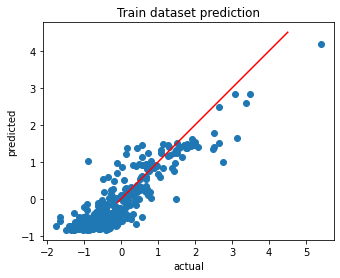

In [74]:
plt.scatter(y_train,y_pred_train)
plt.ylabel('predicted')
plt.xlabel('actual')    
plt.title('Train dataset prediction') 
plt.plot([-0.1,4.5],[-0.1,4.5],c='red')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('train_dataset.jpg',dpi=600,bbox_inches='tight')

### Evaluating on validation dataset

rmse:0.48101761678925814 r2:0.7767606542671457  mae:0.3568588342965572 mape:1.6975885313626764 


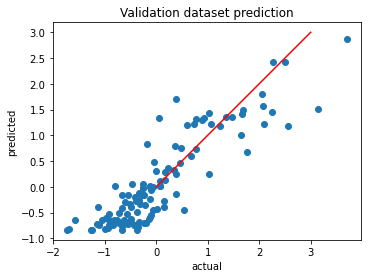

In [76]:
pred=grid.predict(X_val) 
real=y_val   
rmse=np.sqrt(mean_squared_error(real,pred))
mae=mean_absolute_error(real,pred)
mape=mean_absolute_percentage_error(real,pred)
r2=r2_score(real,pred)

plt.scatter(real,pred)
plt.ylabel('predicted')
plt.xlabel('actual')    
plt.title('Validation dataset prediction')   
plt.plot([0,3],[0,3],c='red')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('validation_dataset.jpg',dpi=600,bbox_inches='tight')
print(f'rmse:{rmse} r2:{r2}  mae:{mae} mape:{mape} ')

In [77]:
#rmse:0.21693422141100563 r2:0.7722026977455794  mae:0.15954492973280518 mape:1.0608530532784042 
#result obtained on the validation dataset
#param_grid={"max_depth" : [3],
 #          "min_samples_leaf":[1],
  #         "min_weight_fraction_leaf":[0.0],
   #        "max_features":["auto"],
    #       "max_leaf_nodes":[20],
    #       'n_estimators':[140]}
    
#[['ph_usedP','Amaxmax','1','2','3','stds_1','stds_2','stds_3','meanstd','ddObs_numCCp','rms','magnitude']]   
#features considered
    

### Evaluating on test dataset

rmse:0.5640885714888886 r2:0.7058078969832094  mae:0.44675370687078253 mape:3.3646880381338766 


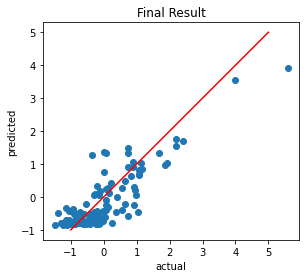

In [78]:
pred=grid.predict(X_test) 
real=y_test   
rmse=np.sqrt(mean_squared_error(real,pred))
mae=mean_absolute_error(real,pred)
mape=mean_absolute_percentage_error(real,pred)
r2=r2_score(real,pred)



plt.scatter(real,pred)
plt.ylabel('predicted')
plt.xlabel('actual')  
plt.title('Final Result')
plt.plot([-1,5],[-1,5],c='red')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('test_dataset.jpg',dpi=600,bbox_inches='tight')   

print(f'rmse:{rmse} r2:{r2}  mae:{mae} mape:{mape} ')

### Best model parameters

In [197]:
best_grid=grid.best_estimator_
params=grid.best_params_
results=grid.cv_results_
best_grid,params


# obtained results
#rmse:0.2520882328619403 r2:0.7052286830108936  mae:0.2000606808807003 mape:2895227248754.099
#(mape not reliable when there are data points with values equal to 0)
#result obtained training the model only on the train dataset and testing on the test dataset


#rmse:0.24626087522322604 r2:0.7186992362279518  mae:0.1951250621685584 mape:2120079719349.2366 
#(mape not reliable when there are data points with values equal to 0)
#result obtained training the same model on the train and validation dataset and testing on the test dataset

(RandomForestRegressor(max_depth=3, max_leaf_nodes=20, n_estimators=140,
                       random_state=100),
 {'n_estimators': 140,
  'min_weight_fraction_leaf': 0.0,
  'min_samples_leaf': 1,
  'max_leaf_nodes': 20,
  'max_features': 'auto',
  'max_depth': 3})

### Saving the model

In [13]:
filename = 'best_model_only_train.sav'
pickle.dump(grid, open(filename, 'wb'))
 
#load the model
loaded_model = pickle.load(open(filename, 'rb'))

In [211]:
loaded_model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=100),
                   n_iter=1,
                   param_distributions={'max_depth': [3],
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': [20],
                                        'min_samples_leaf': [1],
                                        'min_weight_fraction_leaf': [0.0],
                                        'n_estimators': [140]},
                   refit='neg_mean_squared_error',
                   scoring=['neg_mean_squared_error'])

### Evaluate neural network on train and validation dataset

In [39]:

opt = keras.optimizers.Adam(lr=0.0000032,beta_1=0.9,beta_2=0.999)
model=keras.models.Sequential([#keras.layers.Flatten(input_shape=[X_train.shape[0]]),
                               keras.layers.BatchNormalization(),
                               #keras.layers.Dropout(rate=0.08),
                               keras.layers.Dense(1000,activation='elu'
                                                  ,kernel_initializer='glorot_normal'
                                                 #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                 ),
                               #keras.layers.BatchNormalization(),
                               #keras.layers.Dropout(rate=0.07),
                               #keras.layers.Dense(300,activation='elu'
                                              #    ,kernel_initializer='glorot_normal'
                                               #  ,kernel_regularizer=keras.regularizers.l2(0.02)
                                                # ),
                               keras.layers.BatchNormalization(),
                               #keras.layers.Dropout(rate=0.05),
                               keras.layers.Dense(22,activation='selu'
                                                  ,kernel_initializer='lecun_normal'
                                                 #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                 ),
                               #keras.layers.BatchNormalization(),
                               #keras.layers.Dropout(rate=0.21),
                               keras.layers.Dense(1,activation='linear')])
#model.summary()
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.MeanSquaredError()])
import os
root_logdir=os.path.join(os.curdir,'my_logs')
def get_run_logdir():
    import time
    run_id=time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir,run_id)
run_logdir=get_run_logdir()
#tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model_2_layers_700_30.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=200,restore_best_weights=True)
history=model.fit(np.array(X_train),np.array(y_train),
epochs=3500,validation_data=(X_val,y_val),
                 callbacks=[checkpoint_cb,early_stopping_cb])


C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/3500
11/11 [==============================] - 1s 20ms/step - loss: 1.4183 - mean_squared_error: 1.4183 - val_loss: 0.2812 - val_mean_squared_error: 0.2812
Epoch 2/3500
11/11 [==============================] - 0s 6ms/step - loss: 1.2941 - mean_squared_error: 1.2941 - val_loss: 0.2965 - val_mean_squared_error: 0.2965
Epoch 3/3500
11/11 [==============================] - 0s 6ms/step - loss: 1.1176 - mean_squared_error: 1.1176 - val_loss: 0.3181 - val_mean_squared_error: 0.3181
Epoch 4/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.9718 - mean_squared_error: 0.9718 - val_loss: 0.3379 - val_mean_squared_error: 0.3379
Epoch 5/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.7746 - mean_squared_error: 0.7746 - val_loss: 0.3578 - val_mean_squared_error: 0.3578
Epoch 6/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.7661 - mean_squared_error: 0.7661 - val_loss: 0.3705 - val_mean_squared_error: 0.3705
Epoch 7/3500
11/11 [=======

11/11 [==============================] - 0s 7ms/step - loss: 0.1165 - mean_squared_error: 0.1165 - val_loss: 0.1408 - val_mean_squared_error: 0.1408
Epoch 102/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.1222 - mean_squared_error: 0.1222 - val_loss: 0.1384 - val_mean_squared_error: 0.1384
Epoch 103/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.1390 - val_mean_squared_error: 0.1390
Epoch 104/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.1324 - mean_squared_error: 0.1324 - val_loss: 0.1417 - val_mean_squared_error: 0.1417
Epoch 105/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.1235 - mean_squared_error: 0.1235 - val_loss: 0.1399 - val_mean_squared_error: 0.1399
Epoch 106/3500
11/11 [==============================] - 0s 7ms/step - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.1369 - val_mean_squared_error: 0.1369
Epoch 107/3500
11/11 [=========

11/11 [==============================] - 0s 6ms/step - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.1089 - val_mean_squared_error: 0.1089
Epoch 152/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.1055 - val_mean_squared_error: 0.1055
Epoch 153/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.1067 - val_mean_squared_error: 0.1067
Epoch 154/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.1044 - val_mean_squared_error: 0.1044
Epoch 155/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0997 - mean_squared_error: 0.0997 - val_loss: 0.1040 - val_mean_squared_error: 0.1040
Epoch 156/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.1074 - val_mean_squared_error: 0.1074
Epoch 157/3500
11/11 [=========

11/11 [==============================] - 0s 6ms/step - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.0984 - val_mean_squared_error: 0.0984
Epoch 202/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 203/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0936 - val_mean_squared_error: 0.0936
Epoch 204/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.0913 - val_mean_squared_error: 0.0913
Epoch 205/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0916 - mean_squared_error: 0.0916 - val_loss: 0.0969 - val_mean_squared_error: 0.0969
Epoch 206/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.0992 - val_mean_squared_error: 0.0992
Epoch 207/3500
11/11 [=========

Epoch 251/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0885 - val_mean_squared_error: 0.0885
Epoch 252/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0889 - val_mean_squared_error: 0.0889
Epoch 253/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.0942 - val_mean_squared_error: 0.0942
Epoch 254/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.0979 - val_mean_squared_error: 0.0979
Epoch 255/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.0925 - val_mean_squared_error: 0.0925
Epoch 256/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.0904 - val_mean_squared_error: 0.0904
Epoch 257/3500
1

Epoch 301/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0907 - val_mean_squared_error: 0.0907
Epoch 302/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.0899 - val_mean_squared_error: 0.0899
Epoch 303/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0943 - val_mean_squared_error: 0.0943
Epoch 304/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.0914 - val_mean_squared_error: 0.0914
Epoch 305/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.0863 - val_mean_squared_error: 0.0863
Epoch 306/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0901 - val_mean_squared_error: 0.0901
Epoch 307/3500
1

11/11 [==============================] - 0s 5ms/step - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.0984 - val_mean_squared_error: 0.0984
Epoch 401/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0558 - mean_squared_error: 0.0558 - val_loss: 0.0968 - val_mean_squared_error: 0.0968
Epoch 402/3500
11/11 [==============================] - 0s 5ms/step - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 403/3500
11/11 [==============================] - 0s 5ms/step - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.1000 - val_mean_squared_error: 0.1000
Epoch 404/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.0978 - val_mean_squared_error: 0.0978
Epoch 405/3500
11/11 [==============================] - 0s 6ms/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch 406/3500
11/11 [=========

### Saving the model

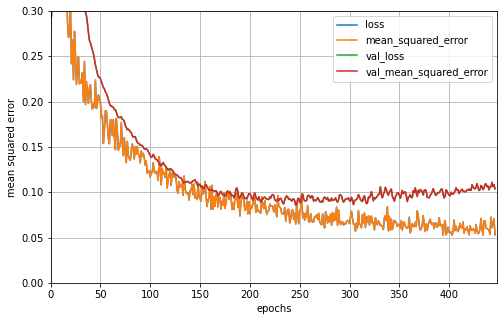

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_xlim(0,448)
plt.gca().set_ylim(0,0.30)
plt.xlabel('epochs')
plt.ylabel('mean squared error')
model.save('my_keras_model_best.h5')
plt.savefig('my_keras_model_best.png')

#### Details about the neural network

In [45]:
model=keras.models.load_model('my_keras_model_best.h5') 
model.summary()

#to visualize activation functions
for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')
#specific info about each layer
for i in range(len(model.layers)):
    print(f'{i}   {model.layers[i]}: \n{model.layers[i].get_config()} \n')
#info about optimizers
model.optimizer.get_config()        

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_27 (Batc (None, 11)                44        
_________________________________________________________________
dense_42 (Dense)             (None, 1000)              12000     
_________________________________________________________________
batch_normalization_28 (Batc (None, 1000)              4000      
_________________________________________________________________
dense_43 (Dense)             (None, 22)                22022     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 23        
Total params: 38,089
Trainable params: 36,067
Non-trainable params: 2,022
_________________________________________________________________
0 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x00000225688E62B0>
   no activ

{'name': 'Adam',
 'learning_rate': 3.2e-06,
 'decay': 0.0,
 'beta_1': 0.89999998,
 'beta_2': 0.99900001,
 'epsilon': 1e-07,
 'amsgrad': False}

### Predict on test dataset

rmse:0.3555482213975645 r2:0.7052286830108936  mae:0.24234773085501635 mape:22898518652677.824 


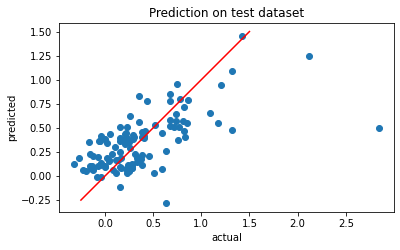

In [46]:
pred=model.predict(X_test) 
real=y_test   
rmse=np.sqrt(mean_squared_error(real,pred))
mae=mean_absolute_error(real,pred)
mape=mean_absolute_percentage_error(real,pred)
plt.scatter(real,pred)
plt.ylabel('predicted')
plt.xlabel('actual')    
plt.title('Prediction on test dataset')
plt.plot([-0.25,1.5],[-0.25,1.5],c='red')
plt.gca().set_aspect('equal', adjustable='box')    
plt.savefig('my_keras_model_best_test.png')

print(f'rmse:{rmse} r2:{r2}  mae:{mae} mape:{mape}')

In [ ]:
#rmse:0.32254441665086847 r2:0.7186992362279518  mae:0.23624630321536147 mape:29793660680229.42 
#(mape not reliable when there are data with values equal to 0)
#result obtained training the model only on the train dataset and testing on the test dataset


#rmse:0.3555482213975645 r2:0.7052286830108936  mae:0.24234773085501635 mape:22898518652677.824 

### RESULTS:
#### The model that performed better on test dataset was RandomForest with the following hyperparameters:
#### {'n_estimators': 140,
####  'min_weight_fraction_leaf': 0.0,
####  'min_samples_leaf': 1,
####  'max_leaf_nodes': 20,
####  'max_features': 'auto',
####  'max_depth': 3}




#### With the following metrics calculated fitting the model on the train+validation dataset and evaluated on the test dataset:
#### rmse:0.24626087       r2:0.71869923         mae:0.19512506

#### And considering the following features:
#### [['ph_usedP','Amaxmax','1','2','3','stds_1','stds_2','stds_3','meanstd','ddObs_numCCp','rms','magnitude']]